In [2]:
cold_stream_data = """
304.7	33687.56826
237.5	28920.23226
236.5	28849.28976
236.422541	28843.79463
215.3233532	28103.44248
214.4	23575.08651
214.3233532	23199.19135
177.75807	21916.14738
177.3	21903.72657
176.3	17542.86605
175.5070345	17521.36437
153.1353747	16914.74509
153	16911.07434
152.1353747	16887.62957
151.6527759	16874.54365
137	16477.22595
80.09	14934.08148
77.26	14857.34455
45	13415.78955
35	5023.404305
30	827.2116854
26.64730743	677.3948611
26.16972734	669.3927564
12.61614675	599.6068067
-11.22	599.6068066
-12.22	0.006806644
"""

hot_stream_data = """
320	33687.55375
319	30687.55376
318.6325863	30687.55375
304.7	30277.30875
237.5	28298.60475
236.5	19197.58975
236.422541	19195.30897
215.3233532	18574.04338
214.4	18546.85525
214.3233532	18544.5304
177.75807	17435.43223
177.3	17421.53805
176.3	17391.20605
175.5070345	17367.15382
153.1353747	13650.81843
153	12897.57113
152.1353747	8069.043476
151.6527759	7979.046521
137	7050.925043
80.09	2317.384821
77.26	2201.106076
45	875.6105619
35	464.7316053
30	365.557127
26.64730743	299.0568197
26.16972734	289.5840685
12.61614675	20.75021163
11.57	0
"""

# Converting the string data into a list of lists
hot_cc = [list(map(float, line.split())) for line in hot_stream_data.strip().split('\n')]
cold_cc = [list(map(float, line.split())) for line in cold_stream_data.strip().split('\n')]


def check_continous(list):
    prev = list[0][1]
    for i in range(1, len(list)):
        next = list[i][1]
        if next >= prev:
            print(next, prev)
            return False
        prev = next
    return True

def format_lists(hot_list, cold_list):
    if hot_list[0][1] != cold_list[0][1]:
        hot_list[0][1] = cold_list[0][1]
    if hot_list[-1][1] != cold_list[-1][1]:
        hot_list[-1][1] = cold_list[-1][1]

hot_data_correctly_placed_in_correct_location = hot_cc[0][0] > cold_cc[0][0]

there_is_continous_increase_of_enthalpy = check_continous(hot_cc) & check_continous(cold_cc)

if hot_data_correctly_placed_in_correct_location & there_is_continous_increase_of_enthalpy:
    print("Data was processed successfully!")
    print(hot_cc)
    print(cold_cc)
elif not hot_data_correctly_placed_in_correct_location:
    print("Hot stream data was incorrectly marked wrongly as the cold stream data. Please revise accordingly.")
elif not there_is_continous_increase_of_enthalpy:
    print("The software cannot handle inputs where the enthalpy value is not strictly unique or in decreasing order for either hot or cold stream. Please revise accordingly.")

Data was processed successfully!
[[320.0, 33687.55375], [319.0, 30687.55376], [318.6325863, 30687.55375], [304.7, 30277.30875], [237.5, 28298.60475], [236.5, 19197.58975], [236.422541, 19195.30897], [215.3233532, 18574.04338], [214.4, 18546.85525], [214.3233532, 18544.5304], [177.75807, 17435.43223], [177.3, 17421.53805], [176.3, 17391.20605], [175.5070345, 17367.15382], [153.1353747, 13650.81843], [153.0, 12897.57113], [152.1353747, 8069.043476], [151.6527759, 7979.046521], [137.0, 7050.925043], [80.09, 2317.384821], [77.26, 2201.106076], [45.0, 875.6105619], [35.0, 464.7316053], [30.0, 365.557127], [26.64730743, 299.0568197], [26.16972734, 289.5840685], [12.61614675, 20.75021163], [11.57, 0.0]]
[[304.7, 33687.56826], [237.5, 28920.23226], [236.5, 28849.28976], [236.422541, 28843.79463], [215.3233532, 28103.44248], [214.4, 23575.08651], [214.3233532, 23199.19135], [177.75807, 21916.14738], [177.3, 21903.72657], [176.3, 17542.86605], [175.5070345, 17521.36437], [153.1353747, 16914.7450

In [3]:
stream_coeffs_dictionary = {
    'C1 Condensor': (1.1, 19.83),
    'C1 Reboiler': (1, 4333.75),
    'C2 Condensor': (1.1, 5398.05),
    'C2 Reboiler': (1, 4869.16),
    'E-101_Segment_1': (0.11, 29.45),
    'E-101_Segment_2': (1.1, 165.23),
    'E-101_Segment_3': (1, 42.09),
    'E-102 (B2)': (1, 0.89),
    'E-103 (Cumene Product)': (1, 20.37),
    'Fresh_Benzene_Segment_1': (1, 11.61),
    'Fresh_Benzene_Segment_2': (0.6, 47.46),
    'Recycled_Benzene_Segment_1': (1, 5.15),
    'Recycled_Benzene_Segment_2': (0.6, 13.12),
    'Fresh_Propylene_Segment_1': (1, 27.93),
    'Fresh_Propylene_Segment_2': (0.6, 10.36),
    'Saturated steam': (4.5, 9071.57),
    'Fired Heater': (4.5, 3000),
    'Cooling water': (2.5, 794.553),
    'Refrigerant': (6.27, 599.6)
}

flipped_stream_coeffs_dictionary = {v: k for k, v in stream_coeffs_dictionary.items()}

In [4]:
hot_streams_dict = {
    "C1 Condensor": (137.00, 11.57),
    "C2 Condensor": (153.1353747, 152.1353747),
    "E-101_Segment_1": (318.6325863, 175.5070345),
    "E-101_Segment_2": (175.5070345, 151.6527759),
    "E-101_Segment_3": (151.6527759, 80.09),
    "E-102 (B2)": (214.40, 35.00),
    "E-103 (Cumene Product)": (153.00, 35.00),
    "Saturated steam": (237.5, 236.5),
    "Fired Heater": (320, 319)
}

# Function to find all coefficients between two temperatures
def find_coefficients_between_hot_intervals(temp_high, temp_low, coefficients_dict):
    coefficients_in_range = []
    for coeff, (high, low) in coefficients_dict.items():
        # Check if the coefficient's temperature range fits within the current interval
        if high >= temp_high and low <= temp_low:
            coefficients_in_range.append(coeff)
    return coefficients_in_range

In [5]:
hot_cc_coeffs_names = []

# Loop through hot_cc and compare consecutive temperature levels
for i in range(len(hot_cc) - 1):
    temp_high = hot_cc[i][0]
    temp_low = hot_cc[i + 1][0]
    
    # Find the coefficients that exist between these two temperature levels
    coefficients_in_range = find_coefficients_between_hot_intervals(temp_high, temp_low, hot_streams_dict)
    
    # Append the result to the list
    hot_cc_coeffs_names.append(coefficients_in_range)

# Print the result
for i, coeffs in enumerate(hot_cc_coeffs_names):
    print(f"Between {hot_cc[i][0]} and {hot_cc[i + 1][0]}: {coeffs}")


Between 320.0 and 319.0: ['Fired Heater']
Between 319.0 and 318.6325863: []
Between 318.6325863 and 304.7: ['E-101_Segment_1']
Between 304.7 and 237.5: ['E-101_Segment_1']
Between 237.5 and 236.5: ['E-101_Segment_1', 'Saturated steam']
Between 236.5 and 236.422541: ['E-101_Segment_1']
Between 236.422541 and 215.3233532: ['E-101_Segment_1']
Between 215.3233532 and 214.4: ['E-101_Segment_1']
Between 214.4 and 214.3233532: ['E-101_Segment_1', 'E-102 (B2)']
Between 214.3233532 and 177.75807: ['E-101_Segment_1', 'E-102 (B2)']
Between 177.75807 and 177.3: ['E-101_Segment_1', 'E-102 (B2)']
Between 177.3 and 176.3: ['E-101_Segment_1', 'E-102 (B2)']
Between 176.3 and 175.5070345: ['E-101_Segment_1', 'E-102 (B2)']
Between 175.5070345 and 153.1353747: ['E-101_Segment_2', 'E-102 (B2)']
Between 153.1353747 and 153.0: ['C2 Condensor', 'E-101_Segment_2', 'E-102 (B2)']
Between 153.0 and 152.1353747: ['C2 Condensor', 'E-101_Segment_2', 'E-102 (B2)', 'E-103 (Cumene Product)']
Between 152.1353747 and 151

In [6]:
cold_streams_dict = {
    "C1 Reboiler": (176.30, 177.30),
    "C2 Reboiler": (214.3233532, 215.3233532),
    "Fresh_Benzene_Segment_1": (26.16972734, 236.422541),
    "Fresh_Benzene_Segment_2": (236.422541, 304.70),
    "Recycled_Benzene_Segment_1": (12.61614675, 177.75807),
    "Recycled_Benzene_Segment_2": (177.75807, 304.70),
    "Fresh_Propylene_Segment_1": (26.64730743, 77.26),
    "Fresh_Propylene_Segment_2": (77.26, 304.70),
    "Cooling water": (30, 45),
    "Refrigerant": (-12.22, -11.22),
}

# Function to find all coefficients between two temperatures
def find_coefficients_between_cold_intervals(temp_high, temp_low, coefficients_dict):
    coefficients_in_range = []
    for coeff, (low, high) in coefficients_dict.items():
        # Check if the coefficient's temperature range overlaps with the current interval
        if high >= temp_high and low <= temp_low:
            coefficients_in_range.append(coeff)
    return coefficients_in_range

In [7]:
cold_cc_coeffs_names = []

# Loop through cold_cc and compare consecutive temperature levels
for i in range(len(cold_cc) - 1):
    temp_high = cold_cc[i][0]
    temp_low = cold_cc[i + 1][0]
    
    # Find the coefficients that exist between these two temperature levels
    coefficients_in_range = find_coefficients_between_cold_intervals(temp_high, temp_low, cold_streams_dict)
    
    # Append the result to the list
    cold_cc_coeffs_names.append(coefficients_in_range)

# Print the result
for i, coeffs in enumerate(cold_cc_coeffs_names):
    print(f"Between {cold_cc[i][0]} and {cold_cc[i + 1][0]}: {coeffs}")

Between 304.7 and 237.5: ['Fresh_Benzene_Segment_2', 'Recycled_Benzene_Segment_2', 'Fresh_Propylene_Segment_2']
Between 237.5 and 236.5: ['Fresh_Benzene_Segment_2', 'Recycled_Benzene_Segment_2', 'Fresh_Propylene_Segment_2']
Between 236.5 and 236.422541: ['Fresh_Benzene_Segment_2', 'Recycled_Benzene_Segment_2', 'Fresh_Propylene_Segment_2']
Between 236.422541 and 215.3233532: ['Fresh_Benzene_Segment_1', 'Recycled_Benzene_Segment_2', 'Fresh_Propylene_Segment_2']
Between 215.3233532 and 214.4: ['C2 Reboiler', 'Fresh_Benzene_Segment_1', 'Recycled_Benzene_Segment_2', 'Fresh_Propylene_Segment_2']
Between 214.4 and 214.3233532: ['C2 Reboiler', 'Fresh_Benzene_Segment_1', 'Recycled_Benzene_Segment_2', 'Fresh_Propylene_Segment_2']
Between 214.3233532 and 177.75807: ['Fresh_Benzene_Segment_1', 'Recycled_Benzene_Segment_2', 'Fresh_Propylene_Segment_2']
Between 177.75807 and 177.3: ['Fresh_Benzene_Segment_1', 'Recycled_Benzene_Segment_1', 'Fresh_Propylene_Segment_2']
Between 177.3 and 176.3: ['C1 Re

In [8]:
hot_cc_coeffs = []

for interval in hot_cc_coeffs_names:
    interval_coeffs = []
    for coeff in interval:
        interval_coeffs.append(stream_coeffs_dictionary.get(coeff))
    hot_cc_coeffs.append(interval_coeffs)

hot_cc_coeffs

[[(4.5, 3000)],
 [],
 [(0.11, 29.45)],
 [(0.11, 29.45)],
 [(0.11, 29.45), (4.5, 9071.57)],
 [(0.11, 29.45)],
 [(0.11, 29.45)],
 [(0.11, 29.45)],
 [(0.11, 29.45), (1, 0.89)],
 [(0.11, 29.45), (1, 0.89)],
 [(0.11, 29.45), (1, 0.89)],
 [(0.11, 29.45), (1, 0.89)],
 [(0.11, 29.45), (1, 0.89)],
 [(1.1, 165.23), (1, 0.89)],
 [(1.1, 5398.05), (1.1, 165.23), (1, 0.89)],
 [(1.1, 5398.05), (1.1, 165.23), (1, 0.89), (1, 20.37)],
 [(1.1, 165.23), (1, 0.89), (1, 20.37)],
 [(1, 42.09), (1, 0.89), (1, 20.37)],
 [(1.1, 19.83), (1, 42.09), (1, 0.89), (1, 20.37)],
 [(1.1, 19.83), (1, 0.89), (1, 20.37)],
 [(1.1, 19.83), (1, 0.89), (1, 20.37)],
 [(1.1, 19.83), (1, 0.89), (1, 20.37)],
 [(1.1, 19.83)],
 [(1.1, 19.83)],
 [(1.1, 19.83)],
 [(1.1, 19.83)],
 [(1.1, 19.83)]]

In [9]:
cold_cc_coeffs = []

for interval in cold_cc_coeffs_names:
    interval_coeffs = []
    for coeff in interval:
        interval_coeffs.append(stream_coeffs_dictionary.get(coeff))
    cold_cc_coeffs.append(interval_coeffs)

cold_cc_coeffs

[[(0.6, 47.46), (0.6, 13.12), (0.6, 10.36)],
 [(0.6, 47.46), (0.6, 13.12), (0.6, 10.36)],
 [(0.6, 47.46), (0.6, 13.12), (0.6, 10.36)],
 [(1, 11.61), (0.6, 13.12), (0.6, 10.36)],
 [(1, 4869.16), (1, 11.61), (0.6, 13.12), (0.6, 10.36)],
 [(1, 4869.16), (1, 11.61), (0.6, 13.12), (0.6, 10.36)],
 [(1, 11.61), (0.6, 13.12), (0.6, 10.36)],
 [(1, 11.61), (1, 5.15), (0.6, 10.36)],
 [(1, 4333.75), (1, 11.61), (1, 5.15), (0.6, 10.36)],
 [(1, 11.61), (1, 5.15), (0.6, 10.36)],
 [(1, 11.61), (1, 5.15), (0.6, 10.36)],
 [(1, 11.61), (1, 5.15), (0.6, 10.36)],
 [(1, 11.61), (1, 5.15), (0.6, 10.36)],
 [(1, 11.61), (1, 5.15), (0.6, 10.36)],
 [(1, 11.61), (1, 5.15), (0.6, 10.36)],
 [(1, 11.61), (1, 5.15), (0.6, 10.36)],
 [(1, 11.61), (1, 5.15), (0.6, 10.36)],
 [(1, 11.61), (1, 5.15), (1, 27.93)],
 [(1, 11.61), (1, 5.15), (1, 27.93), (2.5, 794.553)],
 [(1, 11.61), (1, 5.15), (1, 27.93), (2.5, 794.553)],
 [(1, 11.61), (1, 5.15), (1, 27.93)],
 [(1, 11.61), (1, 5.15)],
 [(1, 5.15)],
 [],
 [(6.27, 599.6)]]

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# helper functions

def interpolate_point(x1, y1, x2, y2, x):
    """
    Interpolates the y-value at a given x-coordinate using the gradient between two points.
    """
    if x1 == x2:
        raise ValueError("x1 and x2 cannot be the same value, as this would result in a vertical line.")
    
    gradient = (y2 - y1) / (x2 - x1)
    y = y1 + gradient * (x - x1)
    
    return y

def interpolate_curve(curve_x, curve_y, unique_x):
    """
    Interpolates new points on a curve at the given unique x-values.
    
    Parameters:
    curve_x : list of float
        x-coordinates of the curve.
    curve_y : list of float
        y-coordinates of the curve.
    unique_x : list of float
        x-values where interpolation is needed.
    
    Returns:
    new_x : list of float
        The unique x-values where interpolation was successful.
    new_y : list of float
        The corresponding y-values obtained through interpolation.
    """
    new_x = []
    new_y = []
    
    # Loop through each unique x value
    for x in unique_x:
        # Find two points on the curve between which x falls
        for i in range(len(curve_x) - 1):
            if curve_x[i] >= x >= curve_x[i + 1]:
                # Interpolate the y-value for this x
                y = interpolate_point(curve_x[i], curve_y[i], curve_x[i + 1], curve_y[i + 1], x)
                new_x.append(x)
                new_y.append(y)
                break  # Once the point is interpolated, break out of the inner loop
    
    return new_x, new_y

def compute_gradient(x1, y1, x2, y2):
    """
    Computes the gradient (slope) between two points (x1, y1) and (x2, y2).
    """
    if x1 == x2:
        return None  # Avoid division by zero, vertical line
    return (y2 - y1) / (x2 - x1)

def remove_collinear_points(curve_x, curve_y):
    """
    Removes points where the gradient between (i-1 to i) is the same as (i to i+1).
    
    Parameters:
    curve_x : list of float
        x-coordinates of the curve.
    curve_y : list of float
        y-coordinates of the curve.
    
    Returns:
    new_curve_x : list of float
        x-coordinates after removing collinear points.
    new_curve_y : list of float
        y-coordinates after removing collinear points.
    """
    new_curve_x = [curve_x[0]]  # Keep the first point
    new_curve_y = [curve_y[0]]
    
    # Loop through the points, starting from the second point to the second-last point
    for i in range(1, len(curve_x) - 1):
        # Compute gradients
        gradient_prev = compute_gradient(curve_x[i-1], curve_y[i-1], curve_x[i], curve_y[i])
        gradient_next = compute_gradient(curve_x[i], curve_y[i], curve_x[i+1], curve_y[i+1])
        
        # If gradients are not equal, keep the current point
        if gradient_prev != gradient_next:
            new_curve_x.append(curve_x[i])
            new_curve_y.append(curve_y[i])
    
    # Keep the last point
    new_curve_x.append(curve_x[-1])
    new_curve_y.append(curve_y[-1])
    
    return new_curve_x, new_curve_y

In [11]:
hot_cc_x = [y for x, y in hot_cc]
hot_cc_y = [x for x, y in hot_cc]
cold_cc_x = [y for x, y in cold_cc]
cold_cc_y = [x for x, y in cold_cc]

# Remove collinear points from Hot CC
# hot_cc_x, hot_cc_y = remove_collinear_points(hot_cc_x, hot_cc_y)

# Remove collinear points from Cold CC
# cold_cc_x, cold_cc_y = remove_collinear_points(cold_cc_x, cold_cc_y)

# Get unique x-axis values and sort them
all_x = hot_cc_x + cold_cc_x
unique_x = sorted(set(all_x))

# Interpolating new points for Hot CC
hot_new_x, hot_new_y = interpolate_curve(hot_cc_x, hot_cc_y, unique_x)

# Interpolating new points for Cold CC
cold_new_x, cold_new_y = interpolate_curve(cold_cc_x, cold_cc_y, unique_x)

In [12]:
import math

def map_coefficients_to_new_segments(new_x, original_x, original_coeffs):
    """
    Maps the heat transfer coefficients from the original segments to the new segments.
    
    Parameters:
    new_x : list of float
        The new y-coordinates (enthalpy) of the modified composite curve.
    original_x : list of tuples
        The original composite curve data where each tuple is (temperature, enthalpy).
    original_coeffs : list of lists
        The heat transfer coefficients and CPs for each segment in the original curve.
    
    Returns:
    new_coefficients : list of lists
        A list where each element is a list of heat transfer coefficients and CPs for a new segment.
    """
    new_coefficients = []
    
    # Extract the original enthalpy values (x-coordinates)
    original_enthalpy = [enthalpy for _,enthalpy in original_x]
    
    # Loop through each new segment
    for i in range(len(new_x) - 1):
        new_start = new_x[i]
        new_end = new_x[i + 1]
        found = False
        # Find the original segment that contains this new segment
        for j in range(len(original_enthalpy) - 1):
            original_start = original_enthalpy[j + 1]
            original_end = original_enthalpy[j]
            
            # Check if the new segment is within the bounds of the original segment
            if original_start <= new_start and original_end >= new_end:
                # Map the coefficients for the corresponding original segment
                new_coefficients.append(original_coeffs[j])
                found = True
                break
        
        if (not found):
            print(new_start, new_end)

    return new_coefficients

def findTLM(start_hot_temp, end_hot_temp, start_cold_temp, end_cold_temp):
    deltaT_left = start_hot_temp - end_cold_temp
    deltaT_right = end_hot_temp - start_cold_temp
    diff = deltaT_left - deltaT_right
    if (deltaT_left == 0  or deltaT_right == 0):
        return (deltaT_right + deltaT_left)/2
    log_diff = math.log(deltaT_left / deltaT_right)
    return diff/log_diff
    

In [13]:
new_hot_cc_coeffs = map_coefficients_to_new_segments(hot_new_x, hot_cc, hot_cc_coeffs)
new_cold_cc_coeffs = map_coefficients_to_new_segments(cold_new_x, cold_cc, cold_cc_coeffs)
print(len(new_hot_cc_coeffs))
print(len(new_cold_cc_coeffs))

for i in range(len(new_cold_cc_coeffs)):
    a = []
    segment = new_cold_cc_coeffs[i]
    for cc in segment:
        a.append(flipped_stream_coeffs_dictionary.get(cc))
    print(cold_new_y[i], cold_new_y[i + 1])
    print(a)

52
52
-12.22 -12.185404594750631
['Refrigerant']
-12.185404594750631 -11.737049263046615
['Refrigerant']
-11.737049263046615 -11.721250812078145
['Refrigerant']
-11.721250812078145 -11.610343028047325
['Refrigerant']
-11.610343028047325 -11.444941963492157
['Refrigerant']
-11.444941963492157 -11.22
['Refrigerant']
-11.22 12.61614675
[]
12.61614675 26.16972734
['Recycled_Benzene_Segment_1']
26.16972734 26.64730743
['Fresh_Benzene_Segment_1', 'Recycled_Benzene_Segment_1']
26.64730743 30.0
['Fresh_Benzene_Segment_1', 'Recycled_Benzene_Segment_1', 'Fresh_Propylene_Segment_1']
30.0 30.057669989068106
['Fresh_Benzene_Segment_1', 'Recycled_Benzene_Segment_1', 'Fresh_Propylene_Segment_1', 'Cooling water']
30.057669989068106 31.637072597886327
['Fresh_Benzene_Segment_1', 'Recycled_Benzene_Segment_1', 'Fresh_Propylene_Segment_1', 'Cooling water']
31.637072597886327 31.775625275922213
['Fresh_Benzene_Segment_1', 'Recycled_Benzene_Segment_1', 'Fresh_Propylene_Segment_1', 'Cooling water']
31.775625

In [14]:
def merge_intervals(x, y, h_coeffs, c_coeffs):
    # Initialize merged lists
    merged_x = [x[0]]
    merged_y = [y[0]]
    merged_h_coeffs = []
    merged_c_coeffs = []

    i = 0
    while i < len(x) - 1:
        current_h_coeffs = h_coeffs[i]
        current_c_coeffs = c_coeffs[i]

        # Try merging with the next interval
        while i < len(x) - 2 and current_h_coeffs == h_coeffs[i + 1] and current_c_coeffs == c_coeffs[i + 1]:
            # Merge by skipping the next point
            i += 1
        
        # Add the new merged point and coefficient
        merged_x.append(x[i + 1])
        merged_y.append(y[i + 1])
        merged_h_coeffs.append(current_h_coeffs)
        merged_c_coeffs.append(current_c_coeffs)

        # Move to the next point
        i += 1

    return merged_x, merged_y, merged_h_coeffs, merged_c_coeffs

merged_hot_x, merged_hot_y, merged_h_coeffs, merged_c_coeffs = merge_intervals(hot_new_x, hot_new_y, new_hot_cc_coeffs, new_cold_cc_coeffs)
merged_cold_x, merged_cold_y, merged_h_coeffs, merged_c_coeffs = merge_intervals(cold_new_x, cold_new_y, new_hot_cc_coeffs, new_cold_cc_coeffs)

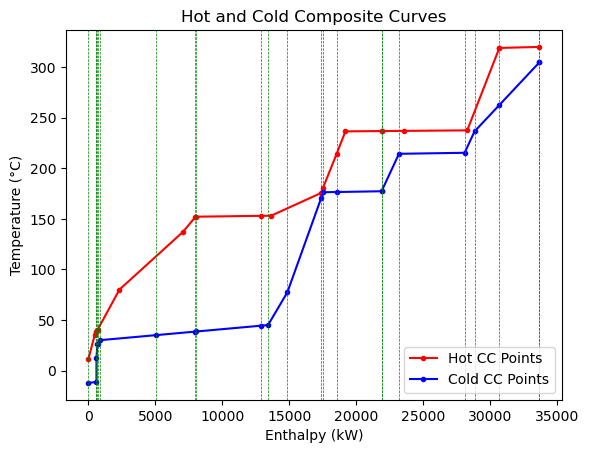

Number of segments: 22


In [15]:
# Plot interpolated points for Hot CC
plt.plot(merged_hot_x, merged_hot_y, color='red', marker='.', label='Hot CC Points')

# Plot interpolated points for Cold CC
plt.plot(merged_cold_x, merged_cold_y, color='blue', marker='.', label='Cold CC Points')

# Draw vertical green lines at each unique x value
for x in merged_cold_x:
    plt.axvline(x=x, color='green', linestyle='--', linewidth=0.5)

# Labels and title
plt.xlabel('Enthalpy (kW)')
plt.ylabel('Temperature (°C)')
plt.title('Hot and Cold Composite Curves')
plt.grid(False)
plt.legend()
plt.show()
print(f"Number of segments: {len(merged_cold_x) - 1}")

In [16]:
print("Hot Streams")
for i, coeffs in enumerate(merged_h_coeffs):
    streams = []
    for coeff in coeffs:
        streams.append(flipped_stream_coeffs_dictionary.get(coeff))
    print(f"Between {merged_hot_y[i]} and {merged_hot_y[i + 1]}: {streams}")

print("=======================================================================================")

print("Cold Streams")
for i, coeffs in enumerate(merged_c_coeffs):
    streams = []
    for coeff in coeffs:
        streams.append(flipped_stream_coeffs_dictionary.get(coeff))
    print(f"Between {merged_cold_y[i]} and {merged_cold_y[i + 1]}: {streams}")

Hot Streams
Between 11.57 and 35.0: ['C1 Condensor']
Between 35.0 and 38.28260182551291: ['C1 Condensor', 'E-102 (B2)', 'E-103 (Cumene Product)']
Between 38.28260182551291 and 38.28260182794672: ['C1 Condensor', 'E-102 (B2)', 'E-103 (Cumene Product)']
Between 38.28260182794672 and 39.98105701965268: ['C1 Condensor', 'E-102 (B2)', 'E-103 (Cumene Product)']
Between 39.98105701965268 and 40.175812788266796: ['C1 Condensor', 'E-102 (B2)', 'E-103 (Cumene Product)']
Between 40.175812788266796 and 80.09: ['C1 Condensor', 'E-102 (B2)', 'E-103 (Cumene Product)']
Between 80.09 and 137.0: ['C1 Condensor', 'E-101_Segment_3', 'E-102 (B2)', 'E-103 (Cumene Product)']
Between 137.0 and 151.6527759: ['E-101_Segment_3', 'E-102 (B2)', 'E-103 (Cumene Product)']
Between 151.6527759 and 152.1353747: ['E-101_Segment_2', 'E-102 (B2)', 'E-103 (Cumene Product)']
Between 152.1353747 and 153.0: ['C2 Condensor', 'E-101_Segment_2', 'E-102 (B2)', 'E-103 (Cumene Product)']
Between 153.0 and 153.1353747: ['C2 Condenso

In [17]:
def findAreaOfSegment(hot_start_temp, hot_end_temp, cold_start_temp, cold_end_temp, hot_coeffs, cold_coeffs):
    Q_over_U = 0
    hot_delta_T = hot_start_temp - hot_end_temp
    cold_delta_T = cold_end_temp - cold_start_temp
    tlm = findTLM(hot_start_temp, hot_end_temp, cold_start_temp, cold_end_temp)
    print(f"TLM: {tlm}")
    for hcoeffs in hot_coeffs:
        htc = hcoeffs[0]
        cp = hcoeffs[1]
        Q_over_U += hot_delta_T * cp / htc

    for ccoeffs in cold_coeffs:
        htc = ccoeffs[0]
        cp = ccoeffs[1]
        Q_over_U += cold_delta_T * cp / htc

    area = Q_over_U / tlm
    return area

In [18]:
Area = 0
for i in range(1, len(merged_hot_x)):
    start_hot_temp = merged_hot_y[i]
    end_hot_temp = merged_hot_y[i-1]
    start_cold_temp = merged_cold_y[i-1]
    end_cold_temp = merged_cold_y[i]
    h_coeffs_segment = merged_h_coeffs[i-1]
    c_coeffs_segment = merged_c_coeffs[i-1]
    print(f"Segment: {i} (from left)")
    print(f"left_hot_temp: {end_hot_temp}, right_hot_temp: {start_hot_temp}")
    print(f"left_cold_temp: {start_cold_temp}, right_cold_temp: {end_cold_temp}")
    h_streams = [flipped_stream_coeffs_dictionary.get(h) for h in h_coeffs_segment]
    print(f"Hot Streams: {h_streams}")
    c_streams = [flipped_stream_coeffs_dictionary.get(c) for c in c_coeffs_segment]
    print(f"Cold Streams: {c_streams}")
    current_segment_area = findAreaOfSegment(start_hot_temp, end_hot_temp, start_cold_temp, end_cold_temp, h_coeffs_segment, c_coeffs_segment)
    print(f"Current segment area: {current_segment_area} m^2")
    Area += current_segment_area
    print("========================================================================")

print(f"Total area: {Area} m^2")

Segment: 1 (from left)
left_hot_temp: 11.57, right_hot_temp: 35.0
left_cold_temp: -12.22, right_cold_temp: -11.22
Hot Streams: ['C1 Condensor']
Cold Streams: ['Refrigerant']
TLM: 33.772629441551416
Current segment area: 15.338130095778553 m^2
Segment: 2 (from left)
left_hot_temp: 35.0, right_hot_temp: 38.28260182551291
left_cold_temp: -11.22, right_cold_temp: 12.61614675
Hot Streams: ['C1 Condensor', 'E-102 (B2)', 'E-103 (Cumene Product)']
Cold Streams: []
TLM: 34.94147654503626
Current segment area: 3.6908707337466433 m^2
Segment: 3 (from left)
left_hot_temp: 38.28260182551291, right_hot_temp: 38.28260182794672
left_cold_temp: 12.61614675, right_cold_temp: 26.16972734
Hot Streams: ['C1 Condensor', 'E-102 (B2)', 'E-103 (Cumene Product)']
Cold Streams: ['Recycled_Benzene_Segment_1']
TLM: 18.049396571089886
Current segment area: 3.867217380880166 m^2
Segment: 4 (from left)
left_hot_temp: 38.28260182794672, right_hot_temp: 39.98105701965268
left_cold_temp: 26.16972734, right_cold_temp: 26

In [19]:
from itertools import chain, combinations

# Function to get all subsets of a list
def all_subsets(lst):
    return list(chain.from_iterable(combinations(lst, r) for r in range(1, len(lst)+1)))

# Function to check max subsets with multiple matching sums and list the subsets
def find_max_matching_subsets(list1, list2):
    # Generate all subsets
    subsets1 = all_subsets(list1)
    subsets2 = all_subsets(list2)
    
    # Calculate sum of subsets for both lists
    sums1 = {sum(subset): subset for subset in subsets1}
    sums2 = {sum(subset): subset for subset in subsets2}
    
    matched_sums = set()  # To keep track of sums already matched
    used_in_list1 = set()  # Elements in list1 that are part of a matched subset
    used_in_list2 = set()  # Elements in list2 that are part of a matched subset
    subsets_count = 0      # Number of valid subsets formed
    
    print("Matching subsets:")
    
    # Find all common sums (with rounding adjustment of ±1)
    for sum1, subset1 in sums1.items():
        for adjustment in range(-1, 2):  # Check for sums in the range of sum1 ± 1
            adjusted_sum = sum1 + adjustment
            if adjusted_sum in sums2 and adjusted_sum not in matched_sums:
                subset2 = sums2[adjusted_sum]
                # Only consider unused elements in both lists
                if not (used_in_list1 & set(subset1)) and not (used_in_list2 & set(subset2)):
                    print(f"Subset from list1: {subset1} (sum ≈ {adjusted_sum})")
                    print(f"Subset from list2: {subset2} (sum ≈ {adjusted_sum})\n")
                    
                    # Mark elements in these subsets as used
                    used_in_list1.update(subset1)
                    used_in_list2.update(subset2)
                    matched_sums.add(adjusted_sum)
                    
                    # Increase subset count
                    subsets_count += 1
                    break  # Stop after the first match for this subset
    
    # Find leftover elements
    leftovers1 = set(list1) - used_in_list1
    leftovers2 = set(list2) - used_in_list2
    
    # Combine leftovers into one subset if there are any
    if leftovers1 or leftovers2:
        print(f"Leftovers combined from both lists: {leftovers1 | leftovers2}")
        subsets_count += 1  # Count all leftovers as a single subset
    
    return subsets_count

In [ ]:
def split_hot_streams_by_pinch(hot_streams_dict, pinch_temp):
    above_pinch = {}
    below_pinch = {}

    for stream, (supply_temp, target_temp) in hot_streams_dict.items():
        if supply_temp >= pinch_temp and target_temp > pinch_temp:
            # Entire stream is above the pinch
            above_pinch[stream] = (supply_temp, target_temp)
        elif supply_temp < pinch_temp and target_temp <= pinch_temp:
            # Entire stream is below the pinch
            below_pinch[stream] = (supply_temp, target_temp)
        elif supply_temp > pinch_temp and target_temp < pinch_temp:
            # Stream crosses the pinch temperature, split it
            above_pinch[stream] = (supply_temp, pinch_temp)
            below_pinch[stream] = (pinch_temp, target_temp)

    return above_pinch, below_pinch

def split_cold_streams_by_pinch(cold_streams_dict, pinch_temp):
    above_pinch = {}
    below_pinch = {}

    for stream, (supply_temp, target_temp) in cold_streams_dict.items():
        if supply_temp < pinch_temp and target_temp <= pinch_temp:
            # Entire stream is below the pinch
            below_pinch[stream] = (supply_temp, target_temp)
        elif supply_temp >= pinch_temp and target_temp > pinch_temp:
            # Entire stream is above the pinch
            above_pinch[stream] = (supply_temp, target_temp)
        elif supply_temp < pinch_temp and target_temp > pinch_temp:
            # Stream crosses the pinch temperature, split it
            below_pinch[stream] = (supply_temp, pinch_temp)
            above_pinch[stream] = (pinch_temp, target_temp)

    return above_pinch, below_pinch

def dict_of_H(streams_T_dict, streams_coeff_dict):
    dict_H_stream = {}
    for stream, (supp, target) in streams_T_dict.items():
        CP_stream = streams_coeff_dict.get(stream)[1]
        enthalpy = CP_stream * abs(supp - target)
        dict_H_stream[stream] = enthalpy
    return dict_H_stream

hot_pinch_temp = 181.3
cold_pinch_temp = 176.3

hot_above_pinch, hot_below_pinch = split_hot_streams_by_pinch(hot_streams_dict, hot_pinch_temp)
cold_above_pinch, cold_below_pinch = split_cold_streams_by_pinch(cold_streams_dict, cold_pinch_temp)

h_hot_above_pinch = dict_of_H(hot_above_pinch, stream_coeffs_dictionary)
h_cold_above_pinch = dict_of_H(cold_above_pinch, stream_coeffs_dictionary)
h_hot_below_pinch = dict_of_H(hot_below_pinch, stream_coeffs_dictionary)
h_cold_below_pinch = dict_of_H(cold_below_pinch, stream_coeffs_dictionary)

number_of_streams_above_pinch = len(hot_above_pinch) + len(cold_above_pinch)
list1 = [x for x in h_hot_above_pinch.values()]
list2 = [x for x in h_cold_above_pinch.values()]
subsets_above_pinch = find_max_matching_subsets(list1, list2)

Nmin_MER_above = number_of_streams_above_pinch - subsets_above_pinch

number_of_streams_below_pinch = len(hot_below_pinch) + len(cold_below_pinch)
list3 = [x for x in h_hot_below_pinch.values()]
list4 = [x for x in h_cold_below_pinch.values()]
subsets_below_pinch = find_max_matching_subsets(list3, list4)

Nmin_MER_below = number_of_streams_below_pinch - subsets_below_pinch

print(f"Nmin above pinch point: {Nmin_MER_above}")
print(f"Nmin above below point: {Nmin_MER_below}")

Matching subsets:
Leftovers combined from both lists: {1665.4781215999997, 4869.16, 7.50906049999996, 3240.4482041399997, 4044.444666535, 4333.75, 9071.57, 1330.2239999999997, 3000, 698.0227010099998, 29.458999999999996}
Matching subsets:
Leftovers combined from both lists: {130.20700000000002, 2403.6600000000003, 3012.0772376309997, 3941.4391484780012, 1026.0544, 1413.6125034801003, 599.6, 170.60283397500024, 842.9718442375, 11918.295, 1743.0124655826, 5398.05, 2487.2769}
Streams above pinch point: 10
Streams above below point: 12


In [21]:
CP_fired_heater = stream_coeffs_dictionary.get('Fired Heater')[1]
CP_sat_steam = stream_coeffs_dictionary.get('Saturated steam')[1]
CP_cooling_water = stream_coeffs_dictionary.get('Cooling water')[1]
CP_refrigerant = stream_coeffs_dictionary.get('Refrigerant')[1]

# Capital Cost of Heat Exchangers only

Nmin_MER_total = Nmin_MER_above + Nmin_MER_below - 1 # to account for fired heater separately

target_area = Area - current_segment_area # minus off the fired heater segment area

average_area_of_heat_exchanger = target_area / Nmin_MER_total

average_area_in_sqft = average_area_of_heat_exchanger * 10.7639

cost_per_exchanger = math.exp(11.147 - 0.9186 * math.log(average_area_in_sqft) + 0.09790 * math.log(average_area_in_sqft) ** 2)

total_capital_cost_of_heat_exchangers = cost_per_exchanger * Nmin_MER_total

print(f"Total cost of purchasing heat exchangers: ${round(total_capital_cost_of_heat_exchangers)}, (as {Nmin_MER_total} units of {round(average_area_of_heat_exchanger)} m^2 size heat exchangers were bought at ${round(cost_per_exchanger)} each)")

# Capital cost of fired heater only
def convert_kW_to_BTU_per_hr(kw):
    return kw * 3414.142

heat_absorbed = convert_kW_to_BTU_per_hr(CP_fired_heater)
capital_cost_of_fired_heater = math.exp(0.32325 + 0.766 * math.log(heat_absorbed))

print(f"Capital cost for fired heater required: ${round(capital_cost_of_fired_heater)}, (as heat absorbed is {round(heat_absorbed)} btu/hr and cost function is e^(0.32325 + 0.766 * ln(heat absorbed)))")

# Utility costs per year
sat_steam_cost_per_1000kg = 14.50 # at 450psig with temp of 237.5ish
cooling_water_cost_per_m3 = 0.02 # per m^3 of cooling water
refrigeration_cost_per_GJ = 5.5 #assuming we using at 10 deg farenheit or -12.22 deg c
natural_gas_cost = 3.2 # (per 1000scf of natural gas and 920 btu/scf per page 647 of seider so 920000 btu for $3.20)

efficiency_of_fired_heater = 0.7
unit_amount_of_natural_gas = 920000 * 1.055 # convert BTU to kJ
amount_of_fuel_needed_by_fired_heater = (CP_fired_heater * 3600 * 8000 / unit_amount_of_natural_gas) / efficiency_of_fired_heater
cost_of_fuel = amount_of_fuel_needed_by_fired_heater * natural_gas_cost
print(f"Cost of running fired heater: ${round(cost_of_fuel)}/year")

latent_heat_per_kg_sat_steam = 1785.36 # kJ/kg
mass_flow_rate_of_steam_required = CP_sat_steam / latent_heat_per_kg_sat_steam
amount_of_steam_required = mass_flow_rate_of_steam_required * 3600 * 8000
cost_of_steam = sat_steam_cost_per_1000kg * amount_of_steam_required / 1000
print(f"Annual cost of steam: ${round(cost_of_steam)}/year")

specific_CP_of_Cooling_water = 4.18 #kJ/ kg k
CP_of_water_for_1_m3 = specific_CP_of_Cooling_water * (45 - 30) * 1000
amount_of_water_required = CP_cooling_water * (45 - 30) * 3600 * 8000
cost_of_cooling_water = (amount_of_water_required/CP_of_water_for_1_m3) * cooling_water_cost_per_m3
print(f"Annual cost of cooling water: ${round(cost_of_cooling_water)}/year")

heat_removed_by_refrigerant = CP_refrigerant * 3600 * 8000
cost_of_refrigeration = heat_removed_by_refrigerant * (10 ** -6) * refrigeration_cost_per_GJ
print(f"Annual cost of refrigeration: ${cost_of_refrigeration}/year")

payback_period = 3 # assume 3 years for now

Total_annualised_cost = (capital_cost_of_fired_heater + total_capital_cost_of_heat_exchangers) / payback_period + cost_of_fuel + cost_of_steam + cost_of_cooling_water + cost_of_refrigeration
print(f"Total annualised cost: ${Total_annualised_cost}/year")

Total cost of purchasing heat exchangers: $414000, (as 21 units of 209 m^2 size heat exchangers were bought at $19714 each)
Capital cost for fired heater required: $323858, (as heat absorbed is 10242426 btu/hr and cost function is e^(0.32325 + 0.766 * ln(heat absorbed)))
Cost of running fired heater: $406935/year
Annual cost of steam: $2121862/year
Annual cost of cooling water: $109489/year
Annual cost of refrigeration: $94976.64/year
Total annualised cost: $2979215.241289638/year
